# Importation des données

In [8]:
import os
import string
import re
import math
from math import sqrt
import numpy as np
import random
import time
random.seed(1)


os.chdir('C:/Users/Kim Antunez/Documents/Projets_autres')
print(string.punctuation + "'’")
def mise_en_forme_phrase (phrase):
    phrase = phrase.lower()
    # On elève la ponctuation mais ça peut se discuter (garder les @ et #?)
    phrase = re.sub('( @[^ ]*)|(^@[^ ]*)',"nickname", phrase) #Remplace @... par nickname
    #supprime toutes les ponctuations par défaut + les apostrophes bizarres
    phrase = phrase.translate(str.maketrans('', '', string.punctuation + "'’"))
    # On enlève les passages à la ligne
    phrase = re.sub('\\n', ' ', phrase)
    # On enlève les espaces multiples et les espaces à la fin des phrases
    phrase = re.sub(' +', ' ', phrase)
    phrase = re.sub(' +$', '', phrase)
    return(phrase.split())
#f = open('data/sample_3.txt')
#raw = f.read()
#print(type(raw))
with open('data/sample_3.txt', encoding="utf-8") as myfile:
    phrases = [mise_en_forme_phrase(next(myfile)) for x in range(10000)]
print(phrases[0:10])
#raw = ''.join([''.join(phrase) for phrase in phrases])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'’
[['il', 'mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'de', 'l', 'alphabet'], ['nickname', 'et', 'fière', 'je', 't', 'en', 'voi', 'att', 'j', 'avais', 'oublié'], ['il', 'est', '1', 'heure'], ['eeeeh', 'jfais', 'la', 'go', 'qui', 'a', 'de', 'les', 'programmes', 'mais', 'j', 'ai', 'même', 'pas', 'de', 'navigo', 'ptdddddr', '😭'], ['en', 'tout', 'cas', 'la', 'demoiselle', 'a', 'bien', 'raison'], ['le', 'rathalos', 'est', 'un', 'gros', 'fils', 'de', 'pute', 'bonne', 'nuit'], ['nickname', 'et', 'puis', 'un', 'jour', 'pfffffffffus', 'rien', 'ne', 'fonctionne', 'l', 'humain', 'se', 'meurt', 'à', 'petit', 'feu'], ['nickname', 'je', 'veux', 'pas', 'en', 'savoir', 'sasuke', 'j', 'sais', 'pas', 'qui', 'c', 'est', 'mais', 'j', 'crois', 'il', 'est', 'sombre'], ['à', 'partir', 'de', 'quand', 'peut', 'on', 'se', 'qualifier', 'de', 'fan'], ['go', 'profité', 'de', 'les', '6h20', 'de', 'sommeil', 'qu', 'il', 'me', 'reste']]


In [9]:
import nltk, re, pprint
#nltk.download('punkt')
from nltk import word_tokenize
# words = word_tokenize(raw) # Plus utile maintenant
words = [item for sublist in phrases for item in sublist]
print(type(words))
## On enlève la ponctuation et on met en minuscule :
#words = [word.lower() for word in words if word.isalpha()] # plus utile maintenant
vocabulary = set(words)

print(words[1:10])
print(type(vocabulary))
print(list(vocabulary)[1:10])
    

<class 'list'>
['mérite', 'd', 'être', 'bloquer', 'la', 'lettre', 'de', 'l', 'alphabet']
<class 'set'>
['grossissent', 'ortenburg', 'wish', 'avoir', '35', 'lance', 'lyoko', 'multivitaminés', 'complété']


In [10]:
print("Nombre de mots :", len(words))
print("Taille du vocabulaire :", len(vocabulary))

Nombre de mots : 109479
Taille du vocabulaire : 13546


In [11]:
# Pour changer la taille des graphiques :
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = 20

fdist = nltk.FreqDist(words)
print("Les 10 mots les plus communs sont :")
print(fdist.most_common(10))
print("Les 2 premiers mots et leur occurrence sont :")
for cle, valeur in list(fdist.items())[0:2]:
    print("{} ({} occurrences)".format(cle, valeur))
fdist.plot(50)

Les 10 mots les plus communs sont :
[('nickname', 4457), ('de', 3938), ('le', 2548), ('est', 2144), ('je', 2037), ('les', 1813), ('j', 1785), ('à', 1721), ('c', 1693), ('la', 1620)]
Les 2 premiers mots et leur occurrence sont :
il (868 occurrences)
mérite (10 occurrences)


<Figure size 2000x1000 with 1 Axes>

# Sampling rate
On va simplifier un peu le corpus en enlevant certains mots. Pour cela on va faire un sous-échantillonnage du corpus pour supprimer certains mots. 

Pour chaque mot $w_i$ on note $z(w_i)$ la proportion d'apparition de ce mot, c'est-à-dire le rapport entre le nombre de fois que ce mot apparait et le nombre total de mots. La probabilité de garder un mot le mot $w_i$ est :
$$
\mathbb P(w_i) = \left(\sqrt{\frac{z(w_i)}{q}} + 1 \right)
\times
\frac{q}{z(w_i)}
$$
Le paramètre $q$ est appelé "sample" – échantillonnage – contrôle le nombre de sous-échantillonnages. La valeur par défaut est 0,001.

In [12]:
def calcul_proba(x):
    result = (sqrt(x)+1)*(1/x)
    return(result)
calcul_proba_v = np.vectorize(calcul_proba)

# Génération de l'échantillon de test
Comment on gère les doublons ?

In [13]:
def creer_echantillon(phrases, vocabulary , probabilities_subsampling,  window = 2):
    #Sub-sampling
    nouveau_corpus = [] 
    for phrase in phrases: #on parcourt tous les articles du corpus
        nouveau_corpus.append([]) #on crée une sous liste à chaque nouvel article
        for word in phrase: #et pour tous les mots de l'article
        # Les mots à supprimer sont les mots tels que la loi générée U([0,1]) soit > proba
        # On garde donc les mots si U([0,1]) <= proba
            proba_w = probabilities_subsampling[vocabulary.index(word)]
            if np.random.uniform(low=0.0, high=1.0) <= proba_w:
                nouveau_corpus[-1].append(word)
    #On ne garde que les phrases de plus d'un mot. 
    phrases = [phrase for phrase in nouveau_corpus if len(phrase)>1]
    test_sample = []
    for phrase in phrases:
        # On tire au hasard un mot focus et on récupère son index
        focus = list(range(0, len(phrase)))
        focus = random.choice(focus)
        i = focus
        index_i = vocabulary.index(phrase[i])
        # On tire au hasard un mot contexte dans la fenêtre de ce mot focus et on récupère son index
        i_contexte = list(range(max(i-window,0), min(i+window+1, len(phrase))))
        i_contexte.remove(i)
        i_contexte = random.choice(i_contexte)
        j = i_contexte
        index_j = vocabulary.index(phrase[j])
        test_sample.append([index_i, index_j])
    return(test_sample)
# exemple de test_sample : [6175, 2149]

# Algorithme avec softmax
Si on note $\theta$ le paramètre à estimer, $L(\theta)$ la fonction de perte et $\eta$ le taux d'apprentissage (*learning rate*) alors :
$$
\theta^{(t+1)} = \theta^{(t)} - \eta \nabla_\theta L(\theta)
$$

Pour le négative sampling, la probabilité de garder le mot $w_i$ est égale à :
$$
\mathbb P(w_i) = \frac{f(w_i)^{3/4}}{
\sum_{j=1}^n f(w_j)^{3/4}
}
$$
Avec $f(w_j)$ la fréquence d'apparition du mot $w_j$.

In [14]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    plt.plot(data)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.show();

In [15]:
# On crée le vocabulaire, on calcule les proba de subsampling et negative sampling
sample = 0.01
words = [item for sublist in phrases for item in sublist] #deja fait
fdist = nltk.FreqDist(words) #deja fait
vocabulary = list(set(words)) #deja fait
proportion = np.array([(fdist[w]/ (len(words) * sample)) for w in vocabulary])
p_subsampling = calcul_proba_v(proportion)
p_negativesampling = np.array([(fdist[w]**(3/4)) for w in vocabulary])
p_negativesampling /= p_negativesampling.sum()

print(proportion[1:10])
print(p_subsampling[1:10])
print(p_negativesampling[1:10])


[0.00091342 0.00091342 0.00091342 0.10047589 0.00091342 0.00182683
 0.00091342 0.00091342 0.00091342]
[1127.87761097 1127.87761097 1127.87761097   13.10741629 1127.87761097
  570.79147409 1127.87761097 1127.87761097 1127.87761097]
[2.46091758e-05 2.46091758e-05 2.46091758e-05 8.35875475e-04
 2.46091758e-05 4.13875355e-05 2.46091758e-05 2.46091758e-05
 2.46091758e-05]


## Algorithme avec subsampling

In [17]:
def tirage_neg_sampling(vocabulary, proba_negativesampling, focus, context, K = 5):
    #proba_negativesampling[focus] = 0
    #proba_negativesampling[context] = 0
    liste_vocab = list(range(len(vocabulary)))
    neg_sampling = np.random.choice(liste_vocab, size=K, p=proba_negativesampling)
    #while( (focus in neg_sampling) | (context in neg_sampling)):
    #    neg_sampling = np.random.choice(liste_vocab, size=K, p=proba_negativesampling)
    return(neg_sampling)

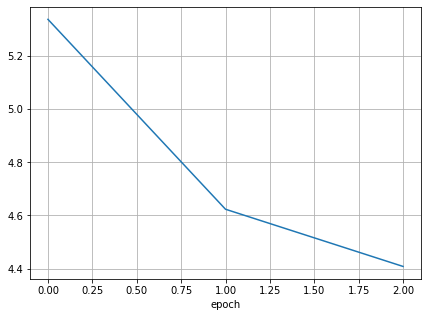

3.01


In [18]:
# Test 2 à faire X min
dim = 10
epoch = 3
learning_rate = 0.01
K = 5

input = torch.randn(len(vocabulary), dim)
output = torch.randn(len(vocabulary), dim)
input = autograd.Variable(input, requires_grad=True)
output = autograd.variable(output, requires_grad=True)

loss_tot = []

start = time.time()
for i in range(epoch):
    compteur = 0
    #print(i)
    loss_val = 0
    test_sample = creer_echantillon(phrases, vocabulary, p_subsampling)
    for focus, context in test_sample:
        compteur+=1
        neg_sample = tirage_neg_sampling(vocabulary, p_negativesampling,
                                         focus, context,
                                         K = K)
        vect_sample = np.append(context, neg_sample)
        data = torch.matmul(input[focus,], torch.t(output[context,]))
        loss1 = - F.logsigmoid(data)

        data = torch.matmul(input[focus,], torch.t(output[neg_sample,]))
        loss2 = - F.logsigmoid(-data).sum()
        #print(loss)
        loss_val += loss1 + loss2
        # Pour ensuite dériver les matrices par rapport à la loss
        (loss1+loss2).backward()
        
        # Il faut modifier juste le .data pour ne pas perdre la structure
        input.data = input.data - learning_rate * input.grad.data
        output.data = output.data - learning_rate * output.grad.data
        
        input.grad.data.zero_()
        output.grad.data.zero_()
    loss_val = loss_val / len(vocabulary)
    loss_tot.append(loss_val)
    live_plot(loss_tot)
end = time.time()
print(round((end - start)/60, 2))

In [19]:
W3 = (input + output)/2
mot_poids = {vocabulary[index]: poids.detach().numpy() for (index, poids) in enumerate(W3)}
for cle, valeur in list(mot_poids.items())[:1]:
    print("Le mot {} a pour coordonnées {}.".format(cle, valeur))
    

def cos_distance(u, v):
    return (np.dot(u, v)  / (math.sqrt(np.dot(u, u)) *  (math.sqrt(np.dot(v, v)))))
def mot_plus_proche(word, n=10):
    word_distance = {}
    for mot in mot_poids:
        if mot != word:
            word_distance[mot] = (cos_distance(mot_poids[mot],(mot_poids[word])))
    word_distance = sorted(word_distance.items(), key=lambda t: t[1],reverse=True)
    return word_distance[0:n]

Le mot signature a pour coordonnées [ 0.99930257  0.57583964  0.15630364  0.9032513  -0.2750622   0.40516764
 -0.05151942  0.20612009 -0.8610595  -0.13646814].


In [20]:
mot_plus_proche("grand")

[('alorsnickname', 0.9064449826922154),
 ('niaw', 0.884765600277602),
 ('yapas', 0.8728791103466244),
 ('squattée', 0.8680008393595477),
 ('boul', 0.8631014736258095),
 ('frager', 0.8593539023424053),
 ('waen', 0.8556218463844105),
 ('surveiller', 0.853363892731487),
 ('bronzer', 0.8314212211658233),
 ('pente', 0.8300833694761184)]

## Evaluation par le "human judgement" 

### Définition et exemple de calcul d'un spearman rank

Résumé de la page wikipédia française : https://fr.wikipedia.org/wiki/Corr%C3%A9lation_de_Spearman

En statistique, la corrélation de Spearman ou rho de Spearman, est une mesure de dépendance statistique non paramétrique entre deux variables.

La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent corrélées sans que la relation entre les deux variables soit de type affine. Elle consiste à trouver un coefficient de corrélation, non pas entre les valeurs prises par les deux variables mais entre les rangs de ces valeurs. Elle estime à quel point la relation entre deux variables peut être décrite par une fonction monotone. S'il n'y a pas de données répétées, une corrélation de Spearman parfaite de +1 ou -1 est obtenue quand l'une des variables est une fonction monotone parfaite de l'autre. 

Pour un échantillon de taille n, les variables de rang ${\displaystyle \operatorname {rg} X_{i},\operatorname {rg} Y_{i}}$ sont calculées à partir des données ${\displaystyle X_{i},Y_{i}}$.

La corrélation de Spearman est définie par :

${\displaystyle r_{s}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{rg_{Y}}}}} $

Où

 ${\displaystyle \operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}$ est la covariances de variables de rang,

   ${\displaystyle \sigma _{\operatorname {rg} _{Y}}} {\displaystyle \sigma _{\operatorname {rg} _{Y}}}$ sont les écarts-type des variables de rang.

On constate que cette définition correspond à la corrélation de Pearson des variables de rang. Le coefficient de Spearman permet de détecter des tendances monotones. Lorsque la tendance est affine, il se comporte de façon similaire au coefficient de Pearson. En revanche, il sera plus élevé que la corrélation de Pearson si la tendance est monotone mais non affine. Plus la tendance monotone est marquée, plus la valeur du coefficient est proche de 1 ou -1.

De façon similaire au coefficient de Pearson, le coefficient de Spearman aura une valeur positive lorsque la tendance est croissante et négative lorsqu'elle est décroissante.

Lorsque la tendance n'est pas monotone, il aura une valeur proche de 0. 

In [182]:
from scipy.stats import spearmanr

# On veut tester la corrélation de ces vecteurs
# (Ce sera à terme les vecteurs de corrélations entre focus et contextes)
x = rand(1000) * 20
x_corr = 2*x #Ce vecteur est censé être ENTIEREMENT corrélé à X
x_moycorr = x + (rand(1000) * 10) #Ce vecteur est censé être FORTEMENT corrélé à X
x_uncorr=[1] #Ce vecteur est censé être NON corrélé à X
for j in range(999):
    x_uncorr.append(2)

#On fait des tests à 5 %
alpha = 0.05

corr1, p_value1 = spearmanr(x, x_corr)
if p_value1 > alpha:
	print('Les échantillons sont non-corrélés (non rejet de H0) p=%.3f' % p_value1)
else:
	print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p_value1,'/ Valeur de la corrélation : %.3f'% corr1)

corr2, p_value2 = spearmanr(x, x_moycorr)
if p_value2 > alpha:
	print('Les échantillons sont non-corrélés (non rejet de H0) p=%.3f' % p_value2)
else:
	print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p_value2,'/ Valeur de la corrélation : %.3f'% corr2)

corr3, p_value3 = spearmanr(x, x_uncorr)
if p_value3 > alpha:
	print('Les échantillons sont non-corrélés (non rejet de H0) p=%.3f' % p_value3,'/ Valeur de la corrélation : %.3f'% corr3)
else:
	print('Les échantillons sont corrélés (rejet de H0) p=%.3f' % p_value3,'/ Valeur de la corrélation : %.3f'% corr3)


Les échantillons sont corrélés (rejet de H0) p=0.000 / Valeur de la corrélation : 1.000
Les échantillons sont corrélés (rejet de H0) p=0.000 / Valeur de la corrélation : 0.894
Les échantillons sont non-corrélés (non rejet de H0) p=0.629 / Valeur de la corrélation : 0.015


### Chargement des données de human judegment et ajouter la distance cosinus du word2vec

In [179]:
import pandas as pd
df = pd.read_csv('C:/Users/Kim Antunez/Documents/Projets_autres/StatApp/data_bis/word_similarity.csv', sep=";")
df

,word1,word2,corr
0,corde,sourire,0.00
1,midi,ficelle,0.00
2,coq,périple,0.06
3,fruit,fournaise,0.11
4,autographe,rivage,0.00
...,...,...,...
60,coussin,oreiller,3.00
61,cimetière,cimetière,4.00
62,automobile,auto,3.94
63,joyau,bijou,3.22


In [180]:
def distance_mots(word1,word2):
    if word1 in mot_poids.keys() and word2 in mot_poids.keys():
        word_distance = (cos_distance(mot_poids[word1],(mot_poids[word2])))
    else:
        word_distance = float('nan')
    return word_distance
distance_mots_v = np.vectorize(distance_mots)

In [181]:
df["corr_word2vec"] = distance_mots_v(df["word1"],df["word2"])
print(len(df))
df = df.dropna()
print(len(df))
df

65


,word1,word2,corr,corr_word2vec
20,garçon,sage,0.29,-0.035004
33,auto,voyage,0.33,-0.493026
35,verre,bijou,0.56,-0.575871
38,frère,gars,2.00,-0.200650
53,voyage,périple,2.59,-0.131820
59,garçon,gars,3.83,-0.172915
64,midi,dîner,2.17,0.582349


In [183]:
from scipy.stats import spearmanr
#On fait des tests à 5 %
alpha = 0.05

corr, p_value = spearmanr(df["corr"], df["corr_word2vec"])
if p_value > alpha:
	print('Le résultat de word2vec est différent de celui du human judgement (non rejet de H0 = non corrélation) p=%.3f' % p_value,'/ Valeur de la corrélation : %.3f'% corr)
else:
	print('Le résultat de word2vec est semblable celui du human judgement (rejet de H0 = non corrélation) p=%.3f' % p_value,'/ Valeur de la corrélation : %.3f'% corr)


Le résultat de word2vec est différent de celui du human judgement (non rejet de H0 = non corrélation) p=0.645 / Valeur de la corrélation : 0.214
